<a href="https://colab.research.google.com/github/rubymanderna/ML_ECGR5105/blob/main/Homework%202_ML/Homework_2_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.a) Repeat problem 2 a, this time by adding a parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  
Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 a.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/ML_ECGR5105/Housing.csv")
# print(df.head())

In [3]:
selected_columns = ['area', 'bedrooms', 'bathrooms','stories','parking','price']
df_new = df[selected_columns].copy()

In [4]:
def preprocess_data_1(df_new):
    X = df_new[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
    y = df_new['price'].values
    m = len(y)
    X_0 = np.ones((m, 1))
    X = np.hstack((X_0, X))
    return X, y, m

In [5]:
def compute_cost(X, y, theta, lambda_param, apply_penalty):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y

    regularization_term = 0  # Initialize regularization term to zero

    if apply_penalty:
        regularization_term = (lambda_param / (2 * m)) * np.sum(theta[1:]**2)  # Add L2 regularization term

    J = 1 / (2 * m) * (np.sum(errors**2) + regularization_term)  # Add regularization term if apply_penalty is True
    return J
#train_loss = compute_cost(X_train, y_train, theta, lambda_param, apply_penalty=True)
#val_loss = compute_cost(X_val, y_val, theta, lambda_param, apply_penalty=False)


In [6]:
# modified gradient decent algorithm to add penalty parameter
def gradient_descent(X, y, theta, alpha, iterations, lambda_param, apply_penalty):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)

        errors = predictions - y
        theta_reg = theta.copy()
        theta_reg[0] = 0  # Exclude bias term from regularization
        regularization_term = lambda_param * theta_reg  # Regularization term

        if apply_penalty:
            theta -= (alpha / m) * (X.T.dot(errors) + regularization_term)
        else:
            theta -= (alpha / m) * X.T.dot(errors)

        cost_history[i] = compute_cost(X, y, theta,lambda_param, apply_penalty)
    return theta, cost_history
#theta, cost_history = gradient_descent(X_train, y_train, theta.copy(), alpha, iterations, lambda_param, apply_penalty=True)


best lampda parameter for 2a is with stadization of data ,best lamda parameter = 10 and with aplha =0.01


In [7]:
from pickle import FALSE

#lets give this penalty paramater and calculate train and valid loss and plot graph apply apply_penalty to just train


from sklearn.model_selection import train_test_split
def train_and_plot_losses(X_train, y_train, X_val, y_val, learning_rates, iterations, lambda_param, apply_penalty):
    best_mse = float('inf')
    best_learning_rate = None
    best_theta = None

    for alpha in learning_rates:
        train_losses = []  # Reset train_losses for each learning rate
        val_losses = []  # Reset val_losses for each learning rate
        theta = np.zeros(X_train.shape[1])  # Initialize theta for each learning rate

        for iteration in range(iterations):
            theta, cost_history = gradient_descent(X_train, y_train, theta.copy(), alpha, iterations, lambda_param,apply_penalty)
            train_loss = compute_cost(X_train, y_train, theta, lambda_param, apply_penalty)
            val_loss = compute_cost(X_val, y_val, theta, lambda_param, apply_penalty=False)

            train_losses.append(train_loss)
            val_losses.append(val_loss)

        # Track best MSE and parameters
        if val_loss < best_mse:
            best_mse = val_loss
            best_learning_rate = alpha
            best_theta = theta.copy()

        plt.plot(train_losses, label=f"Training Loss (Learning Rate: {alpha})")
        plt.plot(val_losses, label=f"Validation Loss (Learning Rate: {alpha})")

        plt.xlabel("Iteration")
        plt.ylabel("Mean Squared Error")
        plt.legend()
        plt.title("Training and Validation Losses for Different Learning Rates")

        plt.show()

    print(f'Best Learning Rate: {best_learning_rate}')
    print(f'Best MSE: {best_mse}')
    print(f'lowest validation loss: {min(val_losses)}')
    print(f'Best Theta: {best_theta}')

    return best_learning_rate, best_mse, best_theta



In [8]:
# 2(a) for 1a
#data standardization without standardization the output
from sklearn.preprocessing import StandardScaler
num_vars = ['area', 'bedrooms', 'bathrooms','stories','parking']
df_standardized = df_new.copy()
# Initialize the StandardScaler for standardization
standard_scaler = StandardScaler()
# Apply the scaler to the selected columns
df_standardized[num_vars] = standard_scaler.fit_transform(df_standardized[num_vars])

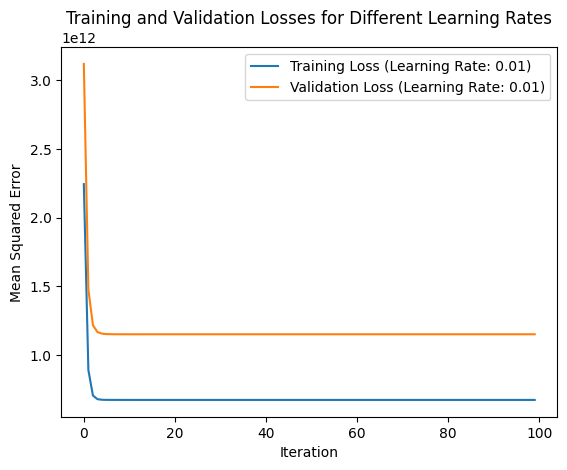

Best Learning Rate: 0.01
Best MSE: 1152039782720.1567
lowest validation loss: 1152028955431.9084
Best Theta: [4743896.29680266  657045.13360379  118668.76387052  582967.11877628
  420942.60011244  289922.18008515]


(0.01,
 1152039782720.1567,
 array([4743896.29680266,  657045.13360379,  118668.76387052,
         582967.11877628,  420942.60011244,  289922.18008515]))

In [9]:
# Define the preprocess_data_1 for stadization function
# Preprocess the data
#best lampda parameter for 2a is with stadization of data ,best lamda parameter = 10 and with aplha =0.01


X, y, m = preprocess_data_1(df_standardized)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up learning rates and iterations
learning_rates = [0.01]
iterations = 100
# Assuming X_train, y_train, X_val, y_val, learning_rates, and iterations are defined.
# Call the function
train_and_plot_losses(X_train, y_train, X_val, y_val, learning_rates, iterations, lambda_param=10,apply_penalty=True)


#Answer for 3a

Added penalty (calculate in problem 2a) : best lampda parameter  is with stadization of data ,best lamda parameter = 10 and with aplha =0.01

**For input Standardization results for 3a Added Penality ***

Best Learning Rate: 0.01

Best MSE: 1152039782720.1567

**For input Standardization results for 2a without Penality***

Best Learning Rate: 0.01

Best MSE: 1146360759971.0007


Comparision : We are getting better result if we dont add the penality paramater in this case output of 2a shows better performance

b) Repeat problem 2 b, this time by adding a parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.
Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 b.

In [10]:
#data for 1b
selected_columns_with_labels = ['area', 'bedrooms', 'bathrooms','stories','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea','parking','price']
df_new_b = df[selected_columns_with_labels].copy()

In [11]:
# Mapping categorical to numerical values
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
df_new_b[varlist] = df_new_b[varlist].apply(binary_map)

In [12]:
#data noramlization without normalizing the output
from sklearn.preprocessing import StandardScaler, MinMaxScaler
selected_columns_without_labels = ['area', 'bedrooms', 'bathrooms','stories','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','parking', 'prefarea','parking']
# Initialize the MinMaxScaler for normalization
min_max_scaler = MinMaxScaler()
# Create a copy of the original DataFrame for normalization
df_normalized_b = df_new_b.copy()
df_normalized_b[selected_columns_without_labels] = min_max_scaler.fit_transform(df_normalized_b[selected_columns_without_labels])

In [13]:
# Preprocess the data for 1b
def preprocess_data_1b(df_new_b):
    X = df_new_b[['area', 'bedrooms', 'bathrooms','stories','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea','parking']].values
    y = df_new_b['price'].values
    m = len(y)
    X_0 = np.ones((m, 1))
    X = np.hstack((X_0, X))
    return X, y, m

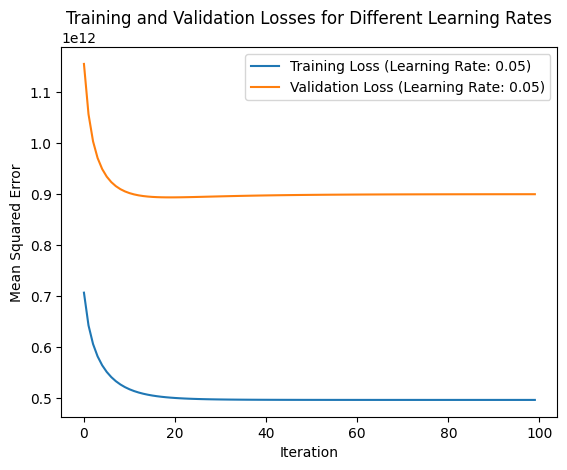

Best Learning Rate: 0.05
Best MSE: 900238626517.4305
lowest validation loss: 894016446445.3959
Best Theta: [1936315.53645238 3419121.96605063  407444.59287341 3296309.49046491
 1278501.25784775  415946.8555519   246396.7409423   433825.97224488
  709919.44859945  810485.14421143  187489.0851092   187489.0851092
  637115.15679831  187489.0851092   187489.0851092 ]


(0.05,
 900238626517.4305,
 array([1936315.53645238, 3419121.96605063,  407444.59287341,
        3296309.49046491, 1278501.25784775,  415946.8555519 ,
         246396.7409423 ,  433825.97224488,  709919.44859945,
         810485.14421143,  187489.0851092 ,  187489.0851092 ,
         637115.15679831,  187489.0851092 ,  187489.0851092 ]))

In [14]:
#here we have not yet normalized the output
# Define the preprocess_data_1 for normalized function
# Preprocess the data
#best lampda parameter for 2b is with normalized of data ,best lamda parameter = .1 and with aplha =0.05


X, y, m = preprocess_data_1b(df_normalized_b)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up learning rates and iterations
learning_rates = [0.05]
iterations = 100
# Assuming X_train, y_train, X_val, y_val, learning_rates, and iterations are defined.
# Call the function
train_and_plot_losses(X_train, y_train, X_val, y_val, learning_rates, iterations, lambda_param=0.1,apply_penalty=True)


#Answer for 3b


Added penalty (calculate in problem 2b) : best lampda parameter  is with normalization of data ,best lamda parameter = 0.1 and with aplha =0.05

**For input normalization results for 3b Added Penality ***

Best Learning Rate: 0.01

Best MSE: 900238626517.4305

**For input normalization results for 2b without Penality***

Best Learning Rate: 0.1

Best MSE: 894200375157.158


Comparision : We are getting better result if we dont add the penality paramater in this case output of 2b shows better performance



#problem 3b this time experiment is with feature and label normalization

In [15]:
#2.b for 1b - #just input and output is noramlized
#data noramlization without normalizing the output
from sklearn.preprocessing import  MinMaxScaler
# Initialize the MinMaxScaler for normalization
selected_columns_with_labels = ['area', 'bedrooms', 'bathrooms','stories','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea','parking','price']

min_max_scaler = MinMaxScaler()
# Create a copy of the original DataFrame for standardization
df_normalized_b_with_labels = df_new_b.copy()
df_normalized_b_with_labels[selected_columns_with_labels] = min_max_scaler.fit_transform(df_normalized_b_with_labels[selected_columns_with_labels])

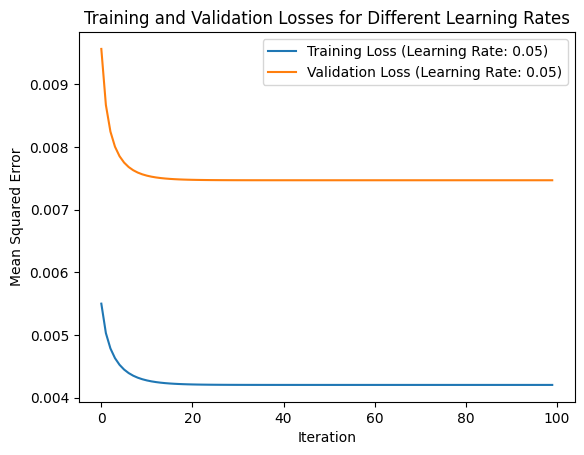

Best Learning Rate: 0.05
Best MSE: 0.0074706288051153685
lowest validation loss: 0.007470628760487567
Best Theta: [0.04453533 0.14606792 0.05355277 0.1576902  0.0994589  0.04382723
 0.03088827 0.0334212  0.04451297 0.07679338 0.02376383 0.02376383
 0.05434756 0.02376383 0.02376383]


(0.05,
 0.0074706288051153685,
 array([0.04453533, 0.14606792, 0.05355277, 0.1576902 , 0.0994589 ,
        0.04382723, 0.03088827, 0.0334212 , 0.04451297, 0.07679338,
        0.02376383, 0.02376383, 0.05434756, 0.02376383, 0.02376383]))

In [16]:
#here we have  normalized the output and input both
# Define the preprocess_data_1 for normalized function
# Preprocess the data
#best lampda parameter for 2b is with normalized of data ,best lamda parameter = 0.1 and with aplha =0.05
#

X, y, m = preprocess_data_1b(df_normalized_b_with_labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up learning rates and iterations
learning_rates = [0.05]
iterations = 100
# Assuming X_train, y_train, X_val, y_val, learning_rates, and iterations are defined.
# Call the function
train_and_plot_losses(X_train, y_train, X_val, y_val, learning_rates, iterations, lambda_param=.1,apply_penalty=True)


#Answer for 3b


Added penalty (calculate in problem 2b) : best lampda parameter  is with normalization of data ,best lamda parameter = 0.1 and with aplha =0.05

**For input and output normalization results for 3b Added Penality ***

Best Learning Rate: 0.01

Best MSE: 0.006748445909814317


**For input and output normalization results for 2b without Penality***

Best Learning Rate: 0.1

Best MSE: 0.0067199252998641264


Comparision : We are getting better result if we dont add the penality paramater in this case output of 2b shows better performance

Therefore, without adding a parameter penalty yields better results for your this dataset and model.